In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score 
from dataFrameCovid import DataFrameCovid as dfc

In [2]:
# Monta dataframe com nome dos arquivos
df = dfc.getDf()

d:\DropB\Faculeste\TCC\codigos\dataFrameCovid.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [15]:
# gerando dataframes de treinamento e de teste
dfTreinamento = df.sample(frac=0.7, random_state=100) # 70% de treinamento
dfTeste = df[~df['arquivo'].isin(dfTreinamento['arquivo'])]     # 30% de teste

In [17]:
width = 32
height = 32
depth = 3
classes = 2
inputShape = (height, width, depth)

In [18]:
imgGen = ImageDataGenerator(rescale = 1./255, 
                            shear_range=0.25, 
                            zoom_range = 0.25, 
                            horizontal_flip = True)

conjTreinamento = imgGen.flow_from_dataframe(dfTreinamento, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=len(dfTreinamento), 
                                  class_mode='categorical')

conjTeste = imgGen.flow_from_dataframe(dfTeste, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=len(dfTeste), 
                                  class_mode='categorical')

Found 5110 validated image filenames belonging to 2 classes.
Found 2190 validated image filenames belonging to 2 classes.


In [19]:
# ShallowNet - Ajustar imagens para 32 x 32
from shallowNet import ShallowNet
shlwClf = ShallowNet()
shlwClf = shlwClf.build(width=width, height=height, depth=3, classes=2)
shlwClf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 65538     
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
spe = 2
epc = 20
vls = 2

In [24]:
print("Shallow Net ***************************************************")
h1 = shlwClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

Shallow Net ***************************************************
Epoch 1/20
2/2 [==============================] - 17s 5s/step - loss: 0.6492 - accuracy: 0.6534 - val_loss: 1.8149 - val_accuracy: 0.5018


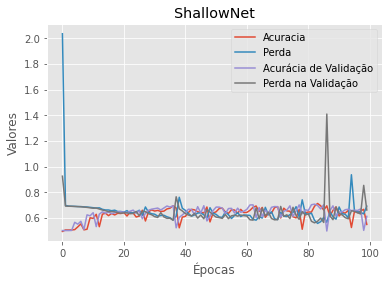

In [ ]:
# Gráfico de Acurácia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["accuracy"], label="Acuracia")
plt.plot(np.arange(0, epc), h1["loss"], label="Perda")
plt.plot(np.arange(0, epc), h1["val_accuracy"], label="Acurácia de Validação")
plt.plot(np.arange(0, epc), h1["val_loss"], label="Perda na Validação")
plt.title("ShallowNet")
plt.xlabel("Épocas")
plt.ylabel("Valores")
plt.legend()
plt.show()